<a href="https://colab.research.google.com/github/intelligenxe/gym-anytrading-RL/blob/main/RL_Trading_Agent_5_0(inx).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation of Libraries

In [1]:
#!pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support
#!pip install git+https://github.com/Stable-Baselines-Team/stable-baselines3-contrib@feat/gymnasium-support

In [2]:
!pip install gym-anytrading

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 53.9 MB/s eta 0:00:00


In [3]:
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.6 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446661 sha256=8bf409445f602e31ff39908ebb28ea238b54b07df95472e88f06812d3a3f73ef
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0
    Uninstalling gymnasium-1.0.0:
      Successfully uninstalled gymnasium-1.0.0


In [4]:
#!pip install shimmy>=0.2.1

In [5]:
!pip install finta

In [6]:
!pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00


## Importing RL libraries

In [7]:
# Processing libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
# Gym stuff
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

In [9]:

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3.common.sb2_compat.rmsprop_tf_like import RMSpropTFLike


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


# Stock Market Data

In [10]:
import yfinance as yf
import pandas as pd

In [11]:
df = yf.download('TQQQ', start='2019-01-01')       # insert stock ticker and start of the date range

[*********************100%***********************]  1 of 1 completed


In [12]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,8.6950,9.5575,8.6825,9.3925,9.084023,135832800
2019-01-03,8.9950,9.1025,8.4075,8.4825,8.203909,165255200
2019-01-04,8.8875,9.6900,8.7925,9.5675,9.253275,136482000
2019-01-07,9.6175,10.0375,9.5325,9.8725,9.548259,106553200
2019-01-08,10.1725,10.2775,9.7250,10.1575,9.823897,105811200


In [13]:
df = df.drop('Adj Close', axis=1)

In [14]:
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,8.6950,9.5575,8.6825,9.3925,135832800
2019-01-03,8.9950,9.1025,8.4075,8.4825,165255200
2019-01-04,8.8875,9.6900,8.7925,9.5675,136482000
2019-01-07,9.6175,10.0375,9.5325,9.8725,106553200
2019-01-08,10.1725,10.2775,9.7250,10.1575,105811200


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1455 entries, 2019-01-02 to 2024-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1455 non-null   float64
 1   High    1455 non-null   float64
 2   Low     1455 non-null   float64
 3   Close   1455 non-null   float64
 4   Volume  1455 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.2 KB


In [16]:
df['Volume'] = df['Volume'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1455 entries, 2019-01-02 to 2024-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1455 non-null   float64
 1   High    1455 non-null   float64
 2   Low     1455 non-null   float64
 3   Close   1455 non-null   float64
 4   Volume  1455 non-null   float64
dtypes: float64(5)
memory usage: 68.2 KB


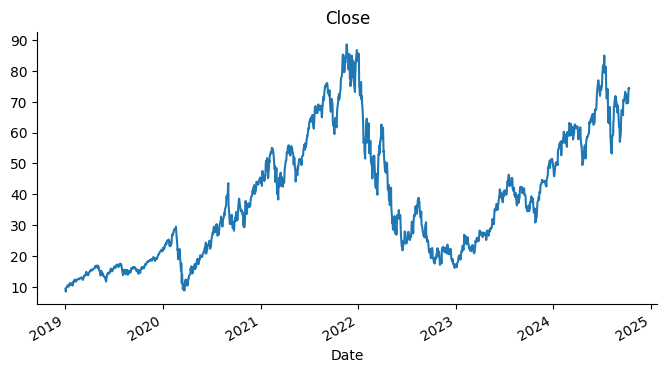

In [18]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
from datetime import datetime

In [20]:
# inplace=True makes the changes in the original dataframe
df.reset_index(inplace=True)
# normalize() method converts times to midnight
df['Date'] = df['Date'].dt.normalize()
df.set_index('Date', inplace=True)
df.sort_values('Date', ascending=True, inplace=True)

In [21]:
data = df
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,8.6950,9.5575,8.6825,9.3925,135832800.0
2019-01-03,8.9950,9.1025,8.4075,8.4825,165255200.0
2019-01-04,8.8875,9.6900,8.7925,9.5675,136482000.0
2019-01-07,9.6175,10.0375,9.5325,9.8725,106553200.0
2019-01-08,10.1725,10.2775,9.7250,10.1575,105811200.0


## Add Custom Indicators

In [22]:
data['return'] = np.log(data['Close'] / data['Close'].shift(1))

In [23]:
from finta import TA

In [24]:
#Create columns for technical indicators & add them to the dataframe
data['RSI'] = TA.RSI(data,16)
data['SMA'] = TA.SMA(data, 20)
data['SMA_L'] = TA.SMA(data, 41)
data['OBV'] = TA.OBV(data)
#data['VWAP'] = TA.VWAP(data)
data['EMA'] = TA.EMA(data)
data['ATR'] = TA.ATR(data)
data.fillna(0, inplace=True)

In [25]:
#Add momentum, volatitlity, & distance to the data_frame
data['momentum'] = data['return'].rolling(5).mean().shift(1)
data['volatility'] = data['return'].rolling(20).std().shift(1)
data['distance'] = (data['Close'] - data['Close'].rolling(50).mean()).shift(1)

In [26]:
#Perform a simple linear regression direction prediction
lags = 5

cols = []
for lag in range(1, lags + 1):
  col = f'lag_{lag}'
  data[col] = data['Close'].shift(lag)
  cols.append(col)

data.dropna(inplace=True)

reg = np.linalg.lstsq(data[cols], data['Close'], rcond=None)[0]
data['Prediction'] = np.dot(data[cols], reg)

In [27]:
data.tail()

,Open,High,Low,Close,Volume,return,RSI,SMA,SMA_L,OBV,...,ATR,momentum,volatility,distance,lag_1,lag_2,lag_3,lag_4,lag_5,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-07,71.050003,71.580002,69.059998,69.599998,41201700.0,-0.033485,52.138115,69.0070,67.241951,8.321427e+09,...,2.914287,0.000111,0.027150,6.152801,71.970001,69.519997,69.680000,69.419998,72.489998,71.899884
2024-10-08,70.660004,72.980003,70.309998,72.620003,38957000.0,0.042476,57.347073,69.6030,67.577805,8.360384e+09,...,2.915001,-0.008137,0.028267,3.692399,69.599998,71.970001,69.519997,69.680000,69.419998,69.699587
2024-10-09,72.519997,74.629997,72.059998,74.370003,39348100.0,0.023812,60.035479,70.0930,67.946585,8.399732e+09,...,2.657144,0.009013,0.029026,6.569203,72.620003,69.599998,71.970001,69.519997,69.680000,72.489998
2024-10-10,73.320000,74.949997,72.720001,74.110001,43030300.0,-0.003502,59.441727,70.4745,68.203902,8.356702e+09,...,2.647144,0.013028,0.026521,8.087603,74.370003,72.620003,69.599998,71.970001,69.519997,74.446653
2024-10-11,73.169998,74.800003,72.900002,74.300003,35264700.0,0.002561,59.752006,70.8220,68.463171,8.391967e+09,...,2.703572,0.012787,0.026091,7.711001,74.110001,74.370003,72.620003,69.599998,71.970001,74.057010


# RL Environment Setup

In [28]:
#Create a function to properly format data frame to be passed through environment
def signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Close'].to_numpy()[start:end]
    #signal_features = env.df.loc[:, ['Open','High','Low','Volume','return','trade_count','momentum','volatility','distance','RSI','OBV','SMA','SMA_L','vwap','EMA','ATR', 'Prediction']].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Open','High','Low','Volume']].to_numpy()[start:end]
    return prices, signal_features

In [29]:
#Replace default data process with custom function from above
class MyCustomEnv(StocksEnv):  # the MyCustomEnv class is declared, and it is inheriting from a Gym class named StocksEnv. This means that MyCustomEnv will have all the attributes and methods of StocksEnv, and you can also add additional attributes and methods or override existing ones.
    _process_data = signals # this line declares a class-level variable _process_data and assigns it the value signals, which is defined above

In [30]:
#Initialize an environment setting the window size and train data
window_size = 65
start_index = window_size
end_train_index = round(len(data)*0.80)
end_val_index = len(data)

env2 = MyCustomEnv(df=data, window_size=window_size, frame_bound=(start_index, end_train_index))

In [31]:
#Create a Dummy Vector of our environment
env_maker = lambda: env2  # This lambda (anonymous) function takes no arguments and simply returns the value of env2.
env = DummyVecEnv([env_maker]) # is an evironment constructor from stable_baselines3. env is now initialized with the environment env2, wrapped inside a DummyVecEnv. The use of env_maker (which is a list) allows for dynamic instantiation of environments.

## Train Test

Here's a breakdown of what each line does in the next code cell:

**1) policy_kwargs = dict(optimizer_class=RMSpropTFLike, optimizer_kwargs=dict(eps=1e-5))**:

-This line creates a dictionary named **policy_kwargs**.

-Inside this dictionary, there's a key named **optimizer_class** which is set to **RMSpropTFLike**.

-Additionally, there's another key named **optimizer_kwargs**, which is set to another dictionary containing a single key-value pair **eps=1e-5**.  

**2)actor_critic = A2C('MlpPolicy', env, policy_kwargs=policy_kwargs, verbose=1):**

-This line initializes an Actor-Critic model using the A2C algorithm.

-**'MlpPolicy'** specifies the type of policy network to be used. In this case, it likely refers to a Multi-layer Perceptron (MLP) policy network.

-**env** refers to the environment in which the agent will learn. It's assumed that **env** has been previously defined and instantiated, representing the reinforcement learning environment.

-**policy_kwargs=policy_kwargs** passes the policy-specific keyword arguments defined earlier to the A2C algorithm.

-**verbose=1** specifies the verbosity level of the training process. Here,
**verbose=1** indicates that training progress will be printed.

**3) actor_critic.learn(total_timesteps=200000):**

-This line initiates the training of the A2C model.

-**total_timesteps=200000** specifies the total number of timesteps (or steps) the agent will take in the environment during training. This is a hyperparameter that determines the duration of training.


In summary, this code initializes an A2C agent with a specified policy network, optimizers, and environment, then proceeds to train the agent for a total of 200,000 timesteps.





In [32]:
#initialize our model and train
policy_kwargs = dict(optimizer_class=RMSpropTFLike, optimizer_kwargs=dict(eps=1e-5))
actor_critic = A2C('MlpPolicy', env, policy_kwargs=policy_kwargs, verbose=1)
actor_critic.learn(total_timesteps=200000)  # this determines the duration of the training

Streaming output truncated to the last 5000 lines.
|    value_loss         | 1.42     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 409      |
|    iterations         | 4400     |
|    time_elapsed       | 53       |
|    total_timesteps    | 22000    |
| train/                |          |
|    entropy_loss       | -0.668   |
|    explained_variance | -14.6    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4399     |
|    policy_loss        | -2.61    |
|    value_loss         | 13.2     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 409      |
|    iterations         | 4500     |
|    time_elapsed       | 54       |
|    total_timesteps    | 22500    |
| train/                |          |
|    entropy_loss       | -0.645   |
|    explained_variance | -118     |
|    learning_rate      

# Testing the Model

In [33]:
#Create a new environment with the test data
env = MyCustomEnv(df=data, window_size=window_size, frame_bound=(end_train_index, end_val_index))
obs = env.reset() # The reset method will be called to initiate a new episode. You may assume that the step method will not be called before reset has been called. Moreover, reset should be called whenever a done signal has been issued. Users may pass the seed keyword to reset to initialize any random number generator that is used by the environment to a deterministic state.

In [34]:
while True: # main loop of RL agent interacting with an environment, taking actions based on predictions from an actor-critic model until the episode is done.
    obs = obs[np.newaxis, ...] # obs = obs[np.newaxis, ...]: This line seems to be reshaping or adding a new axis to the obs variable. The exact nature of this operation depends on what type obs is (likely a numpy array) and what [np.newaxis, ...] is doing
    action, _states = actor_critic.predict(obs) # uses A2C model (this is where you insert your policy) from stable_baselines3 to predict action, and the underscore in _states indicates that it's not going to be used in the subsequent code
    obs, rewards, done, info = env.step(action) # This line performs a step in the environment (env) by taking the action returned by the actor-critic model. It returns the new observation (obs), the rewards obtained from the action (rewards), whether the episode is done (done), and additional information (info).
    if done:
        print("info", info)
        break

TypeError: tuple indices must be integers or slices, not tuple

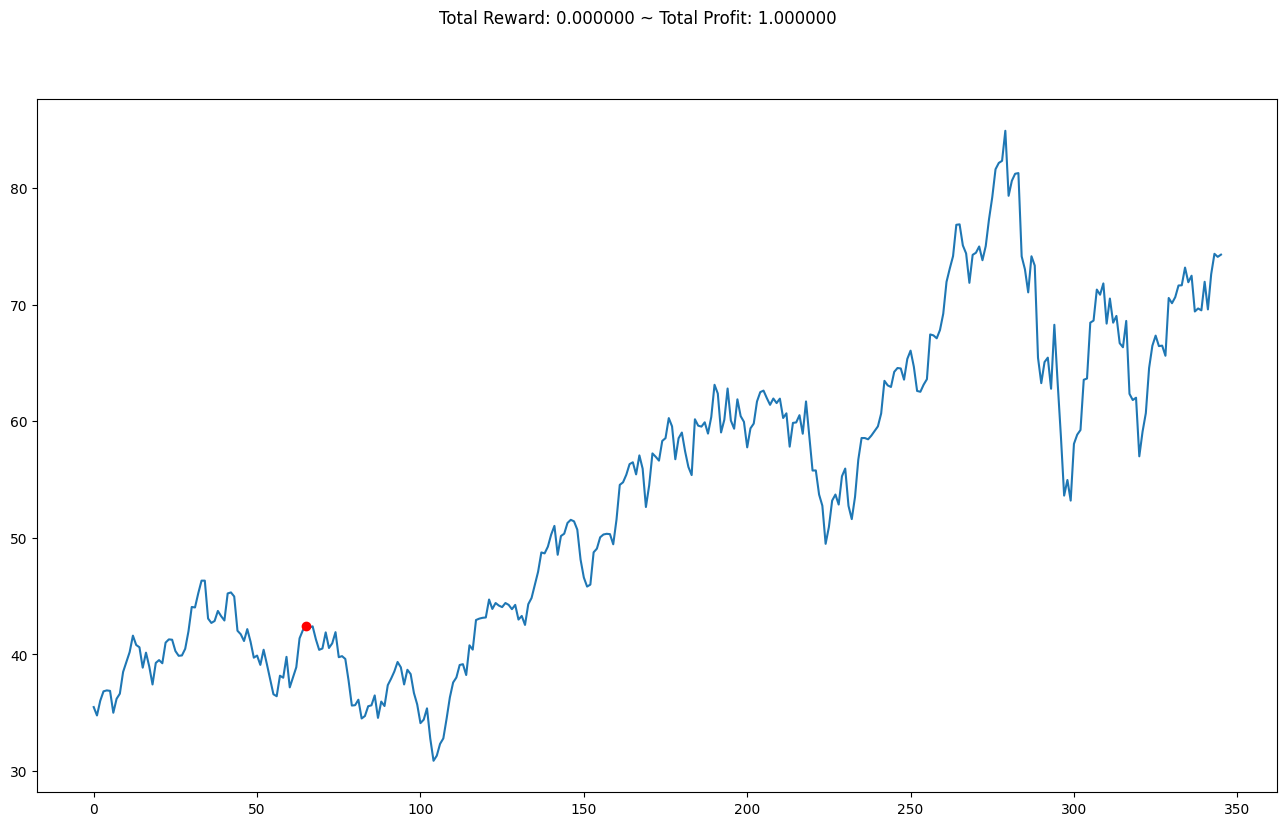

In [35]:
#Plot the results
plt.figure(figsize=(16,9))
env.render_all()
plt.show()

In [36]:
import quantstats as qs

In [37]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=data.index[end_train_index+1:end_val_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)

KeyError: 'total_profit'

Things to do in the future

Create a callback function to stop and save best training weights

Train with longer/shorter time frames

Try different models like DQN or PPO

Bring in some quantstats to evaluate the performance better
